In [2]:
import pandas as pd

orders = pd.read_csv('../data/raw/Orders.csv')
returns = pd.read_csv('../data/raw/Returns.csv')
people = pd.read_csv('../data/raw/People.csv')

orders.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
orders.head()
orders.info()
orders.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Region         9994 non-null   object 
 11  Product ID     9994 non-null   object 
 12  Category       9994 non-null   object 
 13  Sub-Category   9994 non-null   object 
 14  Product Name   9994 non-null   object 
 15  Sales          9994 non-null   float64
 16  Quantity       9994 non-null   int64  
 17  Discount       9994 non-null   float64
 18  Profit  

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,CA-2017-100111,05-09-2016,16-12-2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [7]:
people.isna().sum()


Person    0
Region    0
dtype: int64

In [9]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'], dayfirst=True, errors='coerce')
orders['Ship Date'] = pd.to_datetime(orders['Ship Date'], dayfirst=True, errors='coerce')



In [10]:
orders['Category'] = orders['Category'].astype('category')
orders['Segment'] = orders['Segment'].astype('category')


In [11]:
orders.duplicated().sum()
orders = orders.drop_duplicates()


In [12]:
orders['City'] = orders['City'].str.strip()
orders['State'] = orders['State'].str.strip()
orders['Region'] = orders['Region'].str.title()


In [13]:
orders[['Sales', 'Profit', 'Discount']].describe()
orders[orders['Profit'] < 0]
orders[orders['Discount'] > 0.8]


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [14]:
orders['Returned'] = orders['Order ID'].isin(returns['Order ID'])
orders = orders.merge(people, on='Region', how='left')


In [15]:
orders['Ship_Days'] = (orders['Ship Date'] - orders['Order Date']).dt.days
orders['Profit_Margin'] = orders['Profit'] / orders['Sales']


In [17]:
orders.to_csv('../data/cleaned/Orders_clean.csv', index=False)


In [18]:
#Check for NULLs in each dataset
orders.isna().sum()
returns.isna().sum()
people.isna().sum()


Person    0
Region    0
dtype: int64

In [20]:
#Basic Overview
orders.describe()
orders.describe(include='object')
orders['Category'].value_counts()
orders['Sub-Category'].value_counts()
orders['Segment'].value_counts()


Segment
Consumer       5191
Corporate      3020
Home Office    1782
Name: count, dtype: int64

In [21]:
#Sales & Profit Summary
orders[['Sales', 'Profit']].sum()


Sales     2.296919e+06
Profit    2.864091e+05
dtype: float64

In [22]:
#Overall performance
orders[['Sales', 'Profit']].describe()


,Sales,Profit
count,9993.000000,9993.000000
mean,229.852846,28.660971
std,623.276074,234.271476
min,0.444000,-6599.978000
25%,17.280000,1.731000
50%,54.480000,8.671000
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [23]:
#Profit by Category
orders.groupby('Category')['Profit'].sum().sort_values(ascending=False)


C:\Users\Anusha\AppData\Local\Temp\ipykernel_35448\467866540.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders.groupby('Category')['Profit'].sum().sort_values(ascending=False)


Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18463.3316
Name: Profit, dtype: float64

In [24]:
#Profit by Sub-Category
orders.groupby('Sub-Category')['Profit'].sum().sort_values()


Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26602.2251
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

In [25]:
#Profit by Region
orders.groupby('Region')['Profit'].sum().sort_values()

Region
Central     39706.3625
South       46749.4303
East        91534.8388
West       108418.4489
Name: Profit, dtype: float64

In [26]:
#date check
orders.set_index('Order Date', inplace=True)


In [27]:
#Monthly sales
orders.resample('M')['Sales'].sum()

C:\Users\Anusha\AppData\Local\Temp\ipykernel_35448\744535333.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders.resample('M')['Sales'].sum()


Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28013.9730
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

In [28]:
#Returned Orders Impact
orders.groupby('Returned')['Profit'].sum()


Returned
False    263176.7190
True      23232.3615
Name: Profit, dtype: float64

In [ ]:
#Average Shipping Performance
orders['Ship_Days'].mean()


np.float64(3.9581707195036526)

In [30]:
#Shipping Mode Comparison
orders.groupby('Ship Mode')['Ship_Days'].mean()


Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006704
Name: Ship_Days, dtype: float64

In [31]:
#Top Customers By Sale
orders.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

In [32]:
#Customer Segment Performance
orders.groupby('Segment')[['Sales', 'Profit']].sum()


C:\Users\Anusha\AppData\Local\Temp\ipykernel_35448\3115530149.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders.groupby('Segment')[['Sales', 'Profit']].sum()


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.293718e+05,60310.7373


In [33]:
#Top  Selling
orders.groupby('Product Name')['Sales'].sum().nlargest(10)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

In [34]:
#Least Profitable
orders.groupby('Product Name')['Profit'].sum().nsmallest(10)


Product Name
Cubify CubeX 3D Printer Double Head Print                           -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                           -4589.9730
Cubify CubeX 3D Printer Triple Head Print                           -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases            -2876.1156
Bush Advantage Collection Racetrack Conference Table                -1934.3976
GBC DocuBind P400 Electric Binding System                           -1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit               -1811.0784
Martin Yale Chadless Opener Electric Letter Opener                  -1299.1836
Balt Solid Wood Round Tables                                        -1201.0581
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -1148.4375
Name: Profit, dtype: float64

Matplotlib is building the font cache; this may take a moment.
C:\Users\Anusha\AppData\Local\Temp\ipykernel_35448\943120992.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders.groupby('Category')['Sales'].sum().plot(kind='bar')


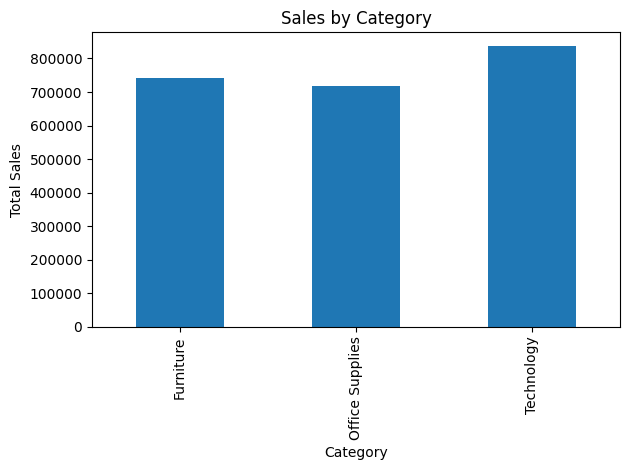

In [36]:
#Sales by Category (Bar Chart)
import matplotlib.pyplot as plt

orders.groupby('Category')['Sales'].sum().plot(kind='bar')

plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


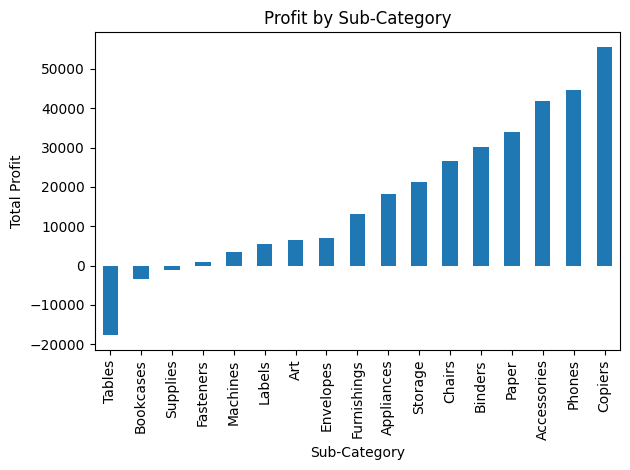

In [37]:
#Profit by Sub-Category (Bar Chart)
orders.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='bar')

plt.title("Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


C:\Users\Anusha\AppData\Local\Temp\ipykernel_35448\1850542406.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = orders.resample('M')['Sales'].sum()


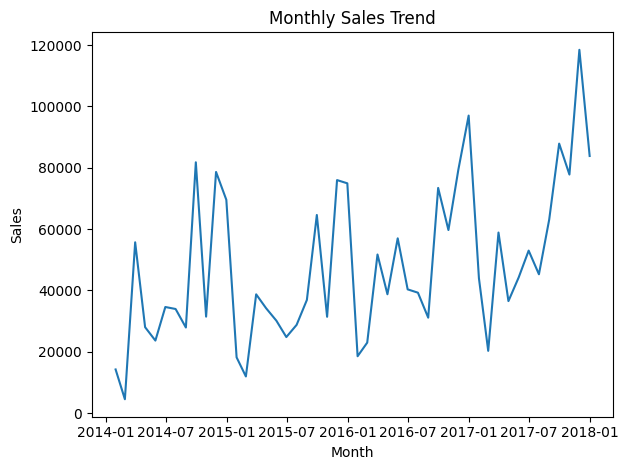

In [38]:
#Monthly Sales Trend (Line Chart)
monthly_sales = orders.resample('M')['Sales'].sum()

plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


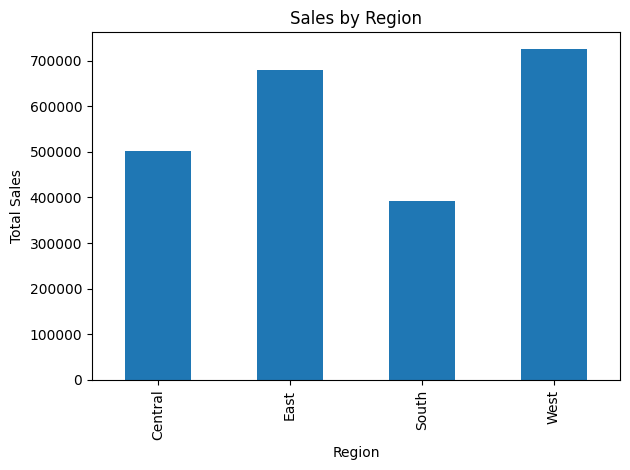

In [39]:
#Sales by Region (Bar Chart)
orders.groupby('Region')['Sales'].sum().plot(kind='bar')

plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


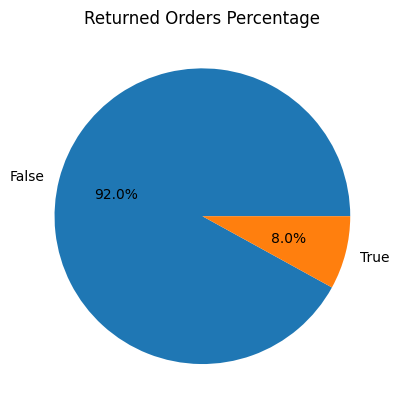

In [40]:
#Returned Orders % (Pie Chart)
orders['Returned'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title("Returned Orders Percentage")
plt.ylabel("")
plt.show()


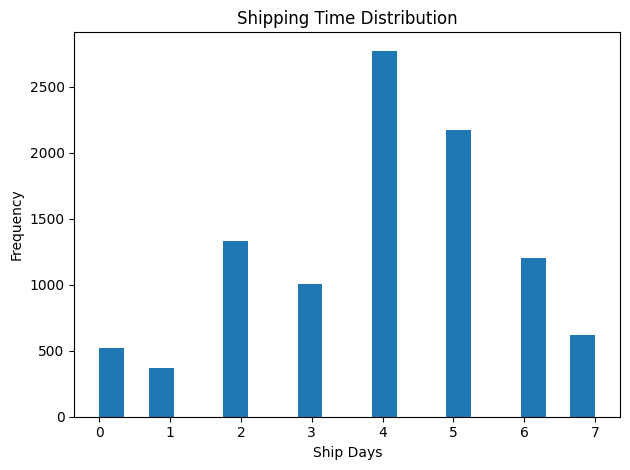

In [41]:
#Shipping Delay Distribution
plt.hist(orders['Ship_Days'], bins=20)

plt.title("Shipping Time Distribution")
plt.xlabel("Ship Days")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


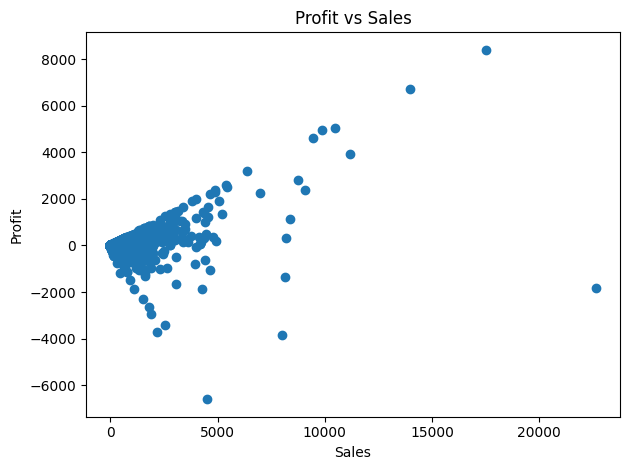

In [42]:
#Profit vs Sales Scatter Plot
plt.scatter(orders['Sales'], orders['Profit'])

plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


# Insights and Business Recommendations

## 1. Profit vs Sales
- There is a clear positive relationship between Sales and Profit.
- Several high-sales orders still show negative profit, which suggests:
  - Heavy discounting  
  - High shipping or handling costs  
  - Returned or damaged products  
- These loss-making orders should be investigated to prevent future profit decline.

---

## 2. Shipping Time Performance
- Most orders are shipped within 4 to 6 days, which appears to be the operational standard.
- A small number of orders ship in 0–1 days, likely express or priority shipments.
- No major shipping delays appear in the data, indicating efficient logistics.

---

## 3. Return Rate Analysis
- Approximately 8% of all orders are returned.
- Returns directly impact profitability and increase operational costs.
- Product categories with higher return rates should be analyzed for:
  - Quality issues  
  - Packaging problems  
  - Customer expectations not being met  

---

## 4. Sales by Region
- The West region contributes the highest sales, followed by the East.
- The South region shows the lowest performance.
- This indicates an opportunity to expand presence, marketing, or customer engagement in the South.

---

## 5. Monthly Sales Trend
- Monthly sales show fluctuations throughout the year.
- A clear upward trend is visible after 2016, indicating business growth.
- Seasonal peaks suggest opportunities to improve:
  - Inventory planning  
  - Workforce allocation  
  - Targeted promotional campaigns  

---

## 6. Profit by Sub-Category
- Tables and Bookcases are the most unprofitable sub-categories, with substantial negative profit.
- Possible causes include:
  - High manufacturing or shipping costs  
  - Ineffective pricing strategy  
  - High discount usage  
- Copiers, Phones, Accessories, and Binders generate strong profits and should be prioritized.

---

## 7. Sales by Category
- Technology is the highest revenue-generating category.
- Office Supplies and Furniture show moderate revenue but typically lower margins.
- Focusing on high-margin Technology products may increase total profitability.

---

# Final Business Recommendations
- Review pricing and discounting strategy for loss-making sub-categories, especially Tables.
- Investigate reasons behind the 8% return rate and take corrective measures.
- Expand marketing and distribution efforts in the underperforming South region.
- Prioritize and promote high-profit sub-categories like Copiers and Phones.
- Use monthly sales patterns to plan inventory, staffing, and seasonal promotions more effectively.
